# Automated Nanoparticle Analysis Using AI Prompt Engineering

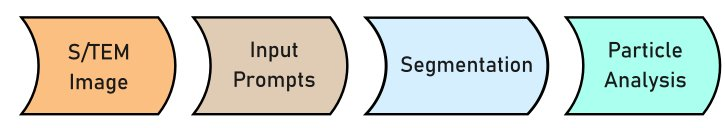

### (A) S/TEM Image
#### Load the libraries and helper functions 

In [3]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
from data_reader import load # read data 
from detector import object_detection, segmentation, segmentation_fast # detect and segment
from sam_visualize import visualize_mask # visualize segmentations
from analysis import particle_analysis 
import numpy as np
import matplotlib.pyplot as plt

diameter_total = []
area_total = []

 #### Load Velox file (S/TEM image)

Detector : HAADF
Mag : 450000
Scan size :2048
Pixel size (nm) : 0.101


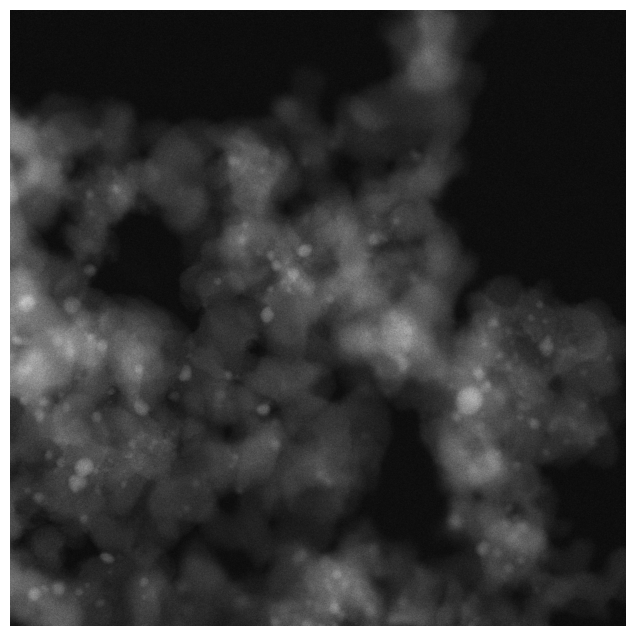

In [4]:
#path_to_data (supported formats : ".emd", ".emi", ".dm3", ".dm4", ".tif", ".tiff", ".jpg", ".png")
path_to_data = r''

# Get the S/TEM image and pixel size (please correct the pixel size if it is not avaiable in the metadata)
img_x, img, pixel_size = load(path_to_data, adap= False)

### (B) Box Prompt
#### Run object detection model on the S/TEM image


0: 1024x1024 159 Particles, 1461.5ms
Speed: 22.6ms preprocess, 1461.5ms inference, 22.1ms postprocess per image at shape (1, 3, 1024, 1024)


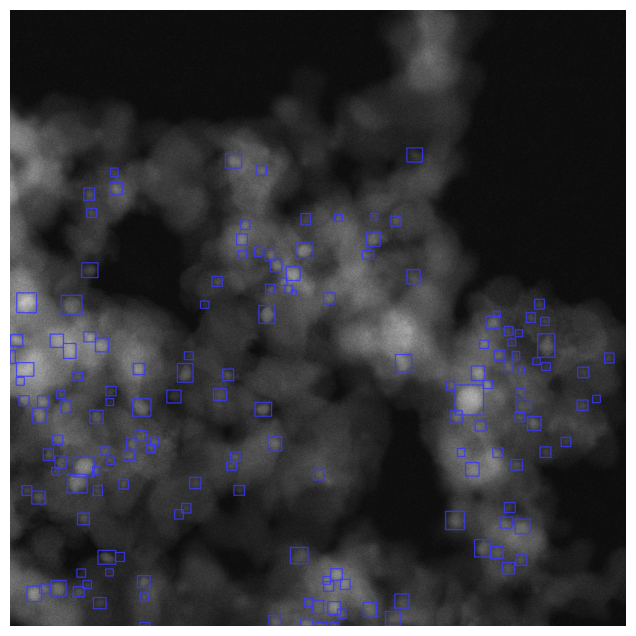

CPU times: total: 5.66 s
Wall time: 9.23 s


In [5]:
# Path to save bbox image
path_to_image = r''

# Get the bounding boxes:
boxes = object_detection(img_x, img, path_to_image, img_size = 1024, pred_score = 0.2, overlap_thr = 0.4, save = False)

### (C) Segmentation
#### Run segmentation model using the box prompts from the object detection model

In [6]:
masks = segmentation(img_x, boxes)

CPU times: total: 2min 3s
Wall time: 22.6 s


#### Visualize Segmentation 

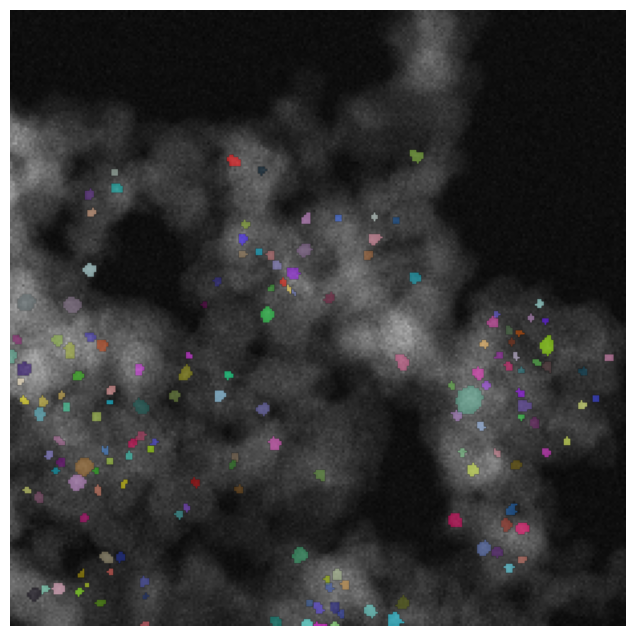

CPU times: total: 7.23 s
Wall time: 15.6 s


In [7]:
# Path to save the output segmented image
path_to_imageseg = r''

visualize_mask(masks, img, path_to_imageseg, img_size = (256, 256), save = False)

### (D) Analysis
#### Measure particle diameter and area

Mean Diameter : 7.41 nm
Mean Area : 49.7 nm²


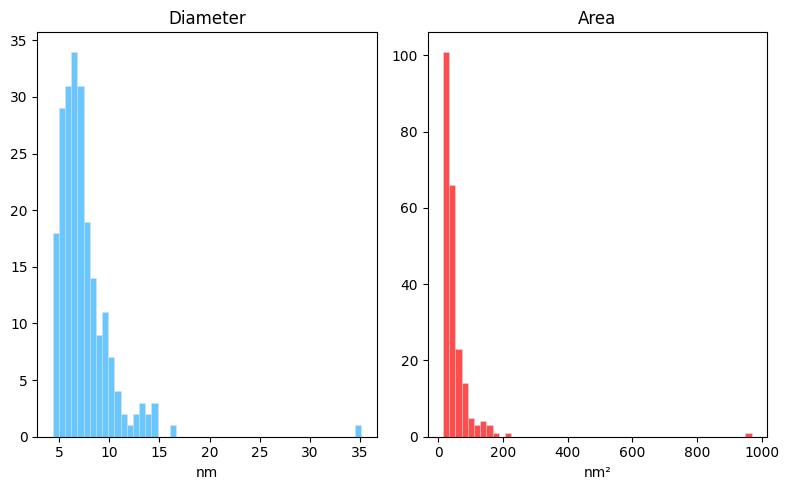

CPU times: total: 7.83 s
Wall time: 15.9 s


In [5]:
# Path to save the output csv file
path_to_csv_file = r''

# Histogram of particle diameter and area
diameter, area = particle_analysis(masks, boxes, pixel_size, path_to_csv_file, save = False)

Detector : HAADF
Mag : 114999.99999999999
Scan size :2048
Pixel size (nm) : 0.404



0: 1024x1024 229 Particles, 105.1ms
Speed: 19.7ms preprocess, 105.1ms inference, 3.0ms postprocess per image at shape (1, 3, 1024, 1024)


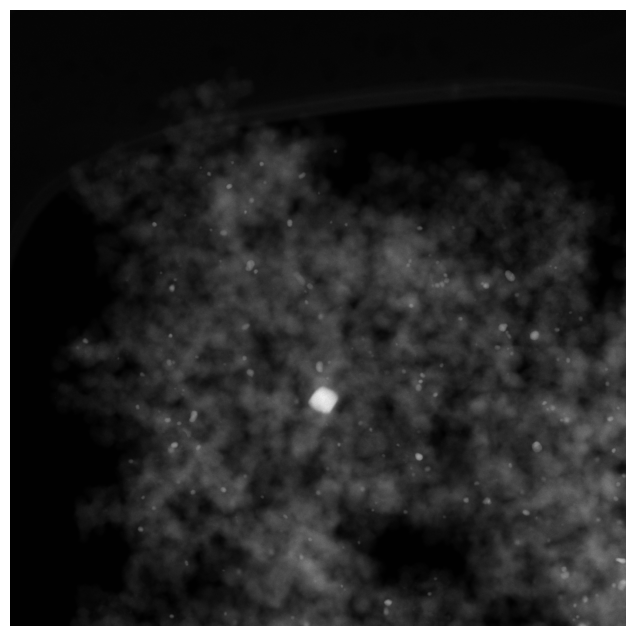

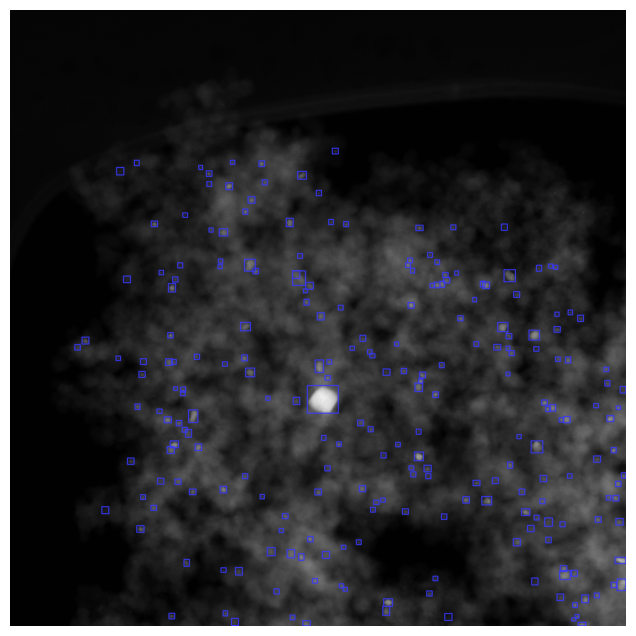

Mean Diameter : 7.41 nm
Mean Area : 49.7 nm²


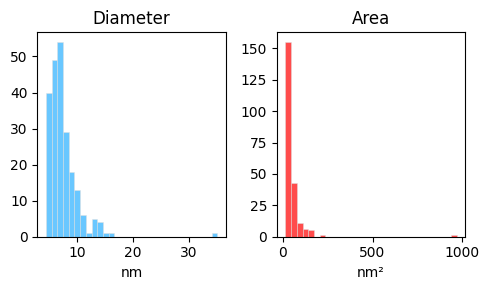

Detector : HAADF
Mag : 114999.99999999999
Scan size :2048
Pixel size (nm) : 0.404



0: 1024x1024 352 Particles, 107.4ms
Speed: 11.5ms preprocess, 107.4ms inference, 6.1ms postprocess per image at shape (1, 3, 1024, 1024)


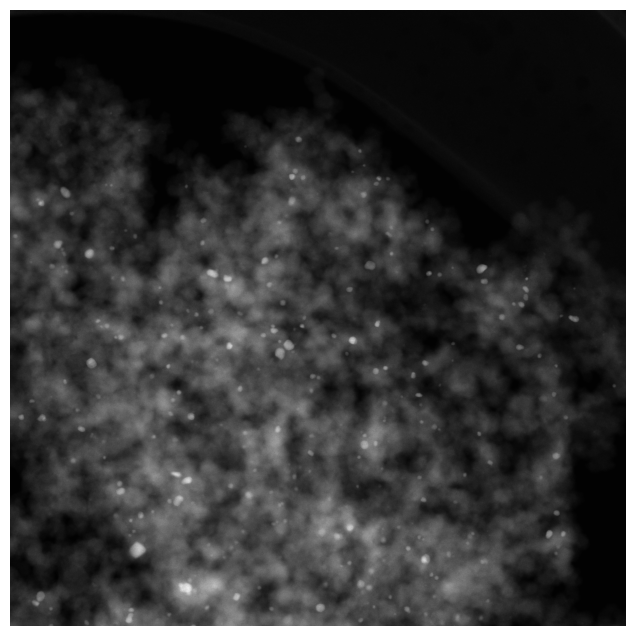

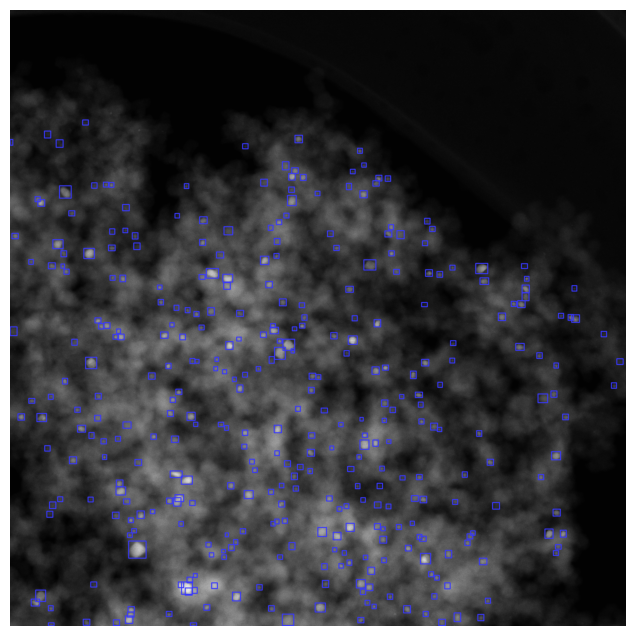

Mean Diameter : 7.66 nm
Mean Area : 49.96 nm²


Detector : HAADF
Mag : 225000
Scan size :2048
Pixel size (nm) : 0.201



0: 1024x1024 65 Particles, 118.2ms
Speed: 8.8ms preprocess, 118.2ms inference, 4.0ms postprocess per image at shape (1, 3, 1024, 1024)


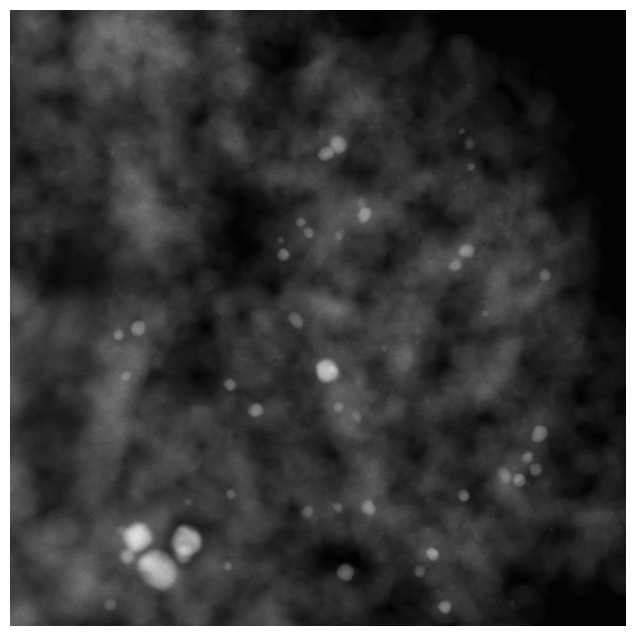

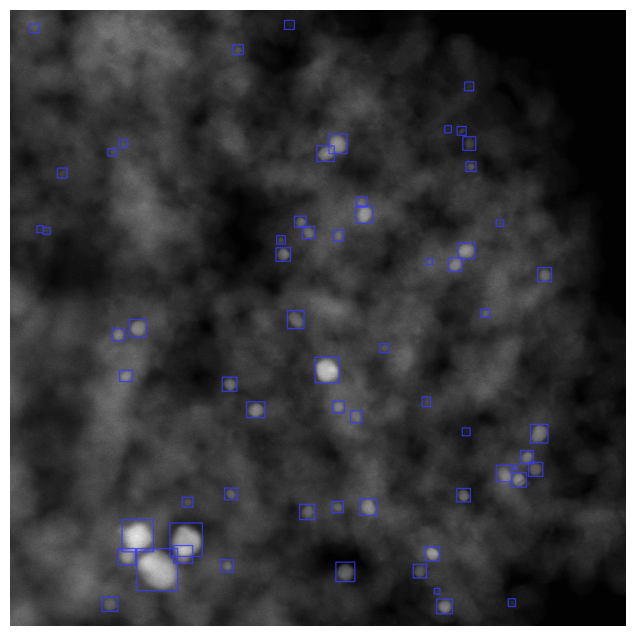

Mean Diameter : 8.01 nm
Mean Area : 61.48 nm²


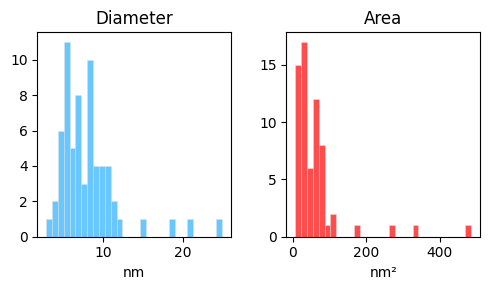

Detector : HAADF
Mag : 114999.99999999999
Scan size :2048
Pixel size (nm) : 0.404



0: 1024x1024 250 Particles, 128.8ms
Speed: 8.5ms preprocess, 128.8ms inference, 2.0ms postprocess per image at shape (1, 3, 1024, 1024)


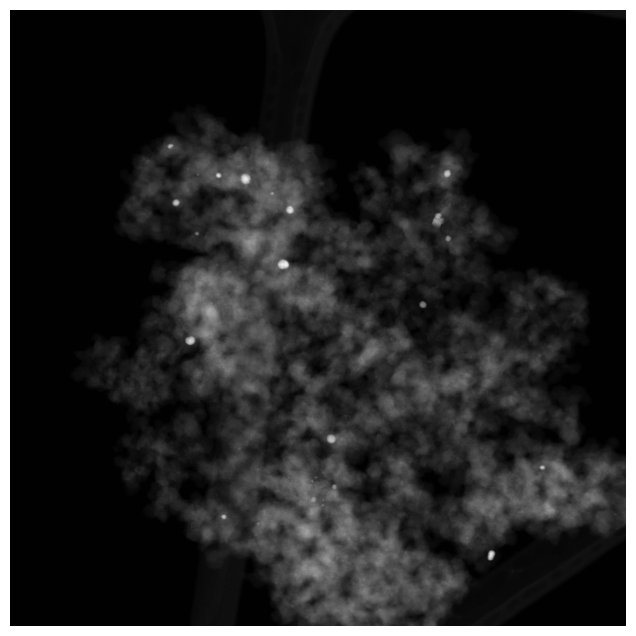

Mean Diameter : 9.3 nm
Mean Area : 72.16 nm²


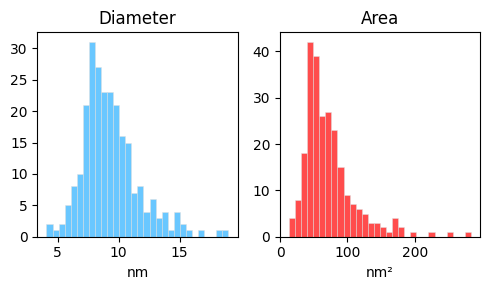

Detector : HAADF
Mag : 80000
Scan size :2048
Pixel size (nm) : 0.572



0: 1024x1024 170 Particles, 298.1ms
Speed: 19.3ms preprocess, 298.1ms inference, 3.0ms postprocess per image at shape (1, 3, 1024, 1024)


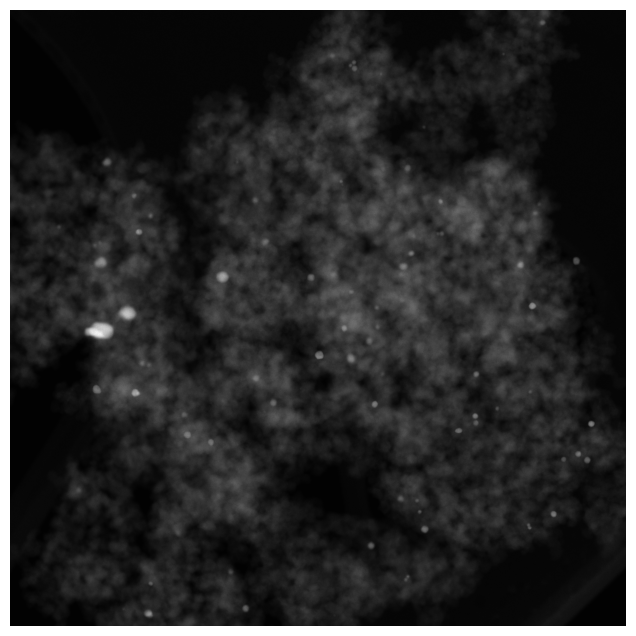

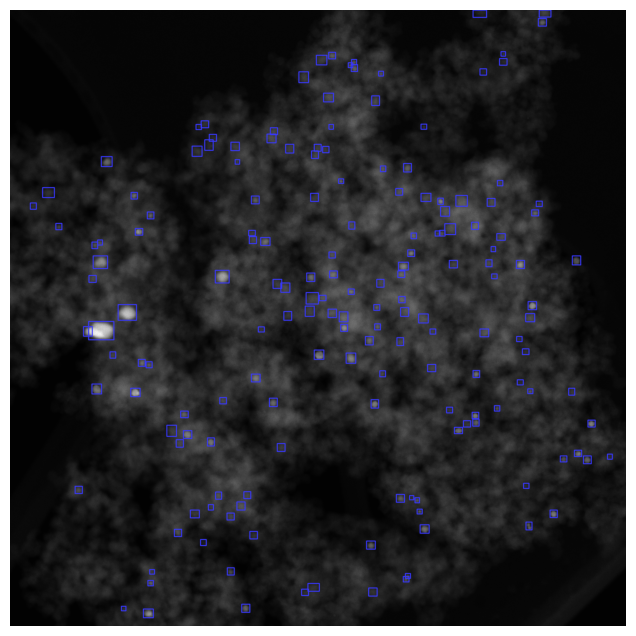

Mean Diameter : 14.02 nm
Mean Area : 167.78 nm²


Detector : HAADF
Mag : 80000
Scan size :2048
Pixel size (nm) : 0.572



0: 1024x1024 550 Particles, 171.5ms
Speed: 6.5ms preprocess, 171.5ms inference, 2.0ms postprocess per image at shape (1, 3, 1024, 1024)


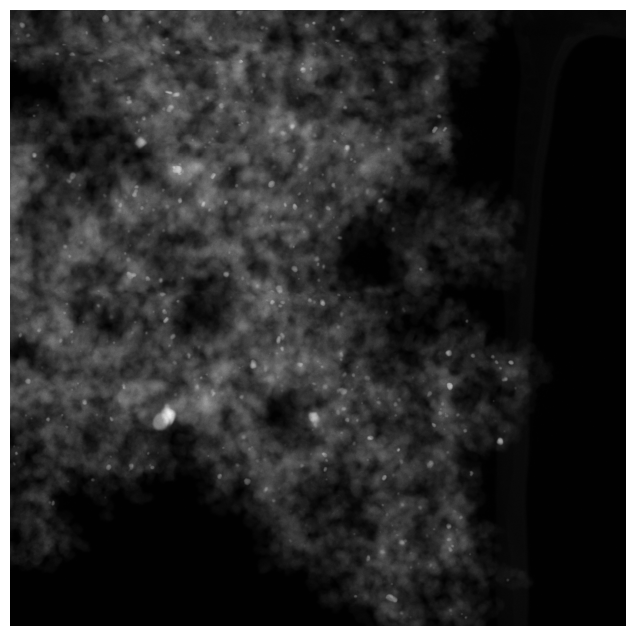

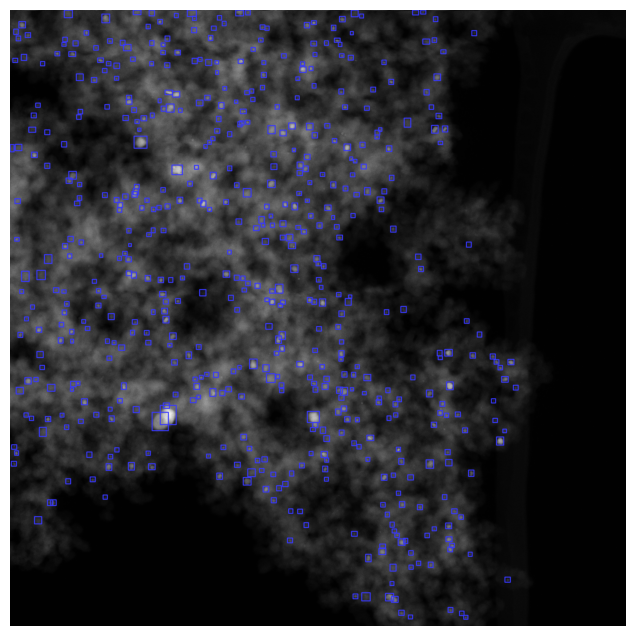

Mean Diameter : 9.31 nm
Mean Area : 74.57 nm²


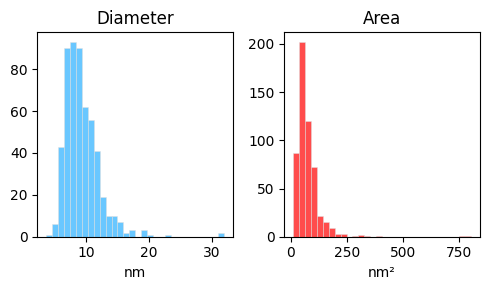

Detector : HAADF
Mag : 80000
Scan size :2048
Pixel size (nm) : 0.572



0: 1024x1024 120 Particles, 118.0ms
Speed: 33.1ms preprocess, 118.0ms inference, 30.3ms postprocess per image at shape (1, 3, 1024, 1024)


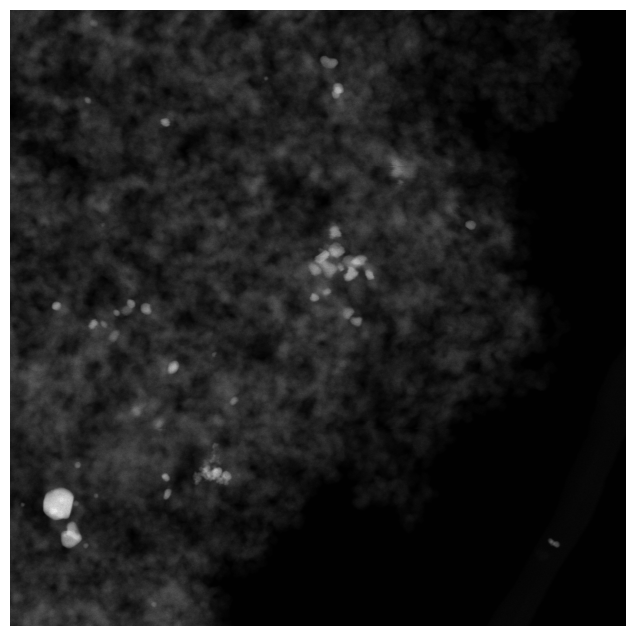

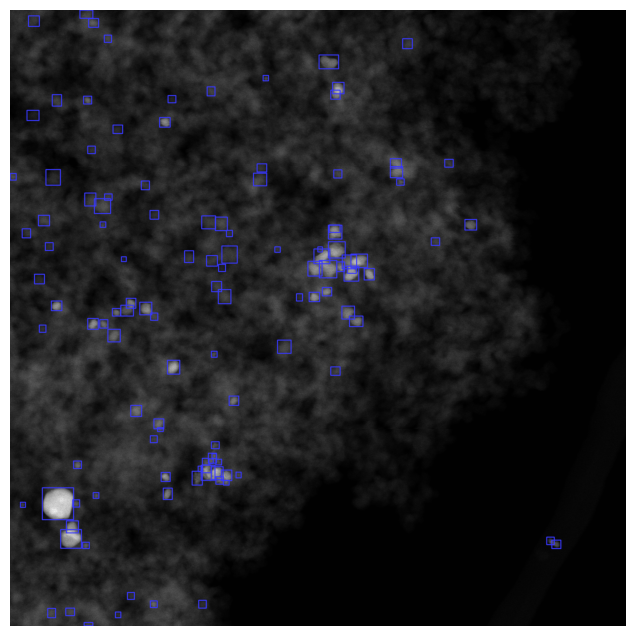

Mean Diameter : 17.88 nm
Mean Area : 286.24 nm²


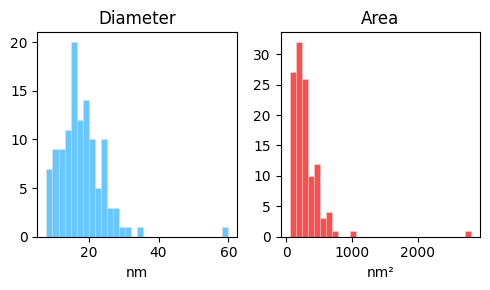

In [9]:
# Batch Processing
import glob

path_to_velox_files = r''
diameter_final = []
area_final = []
for v in glob.glob(path_to_velox_files):
    img_x, img, pixel_size = velox_emd(v)    
    boxes = object_detection(img_x, img, path_to_image, img_size = 1024, pred_score = 0.2, overlap_thr = 0.4, save = False)
    masks = segmentation(img_x, boxes)
    diameter, area = particle_analysis(masks, boxes, pixel_size, path_to_csv_file, save = False)
    diameter_final.append(diameter)
    area_final.append(area)
diameter_total = np.concatenate((diameter_final))
area_total = np.concatenate((area_final))


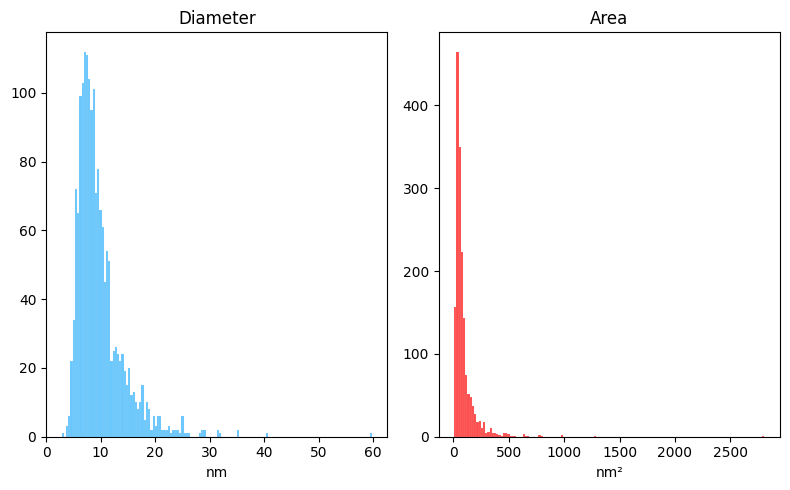

In [37]:
fig, axs = plt.subplots(1, 2, sharey = False, tight_layout = False, figsize=(8, 5))
axs[0].hist(diameter_total, bins =140, facecolor='#2ab0ff', edgecolor='#e0e0e0', linewidth=0.1, alpha=0.7)
axs[0].set_title("Diameter")
axs[0].set_xlabel('nm')
axs[1].hist(area_total, bins = 140, facecolor='red', edgecolor='#e0e0e0', linewidth=0.1, alpha=0.7)
axs[1].set_title("Area")
axs[1].set_xlabel('nm\u00b2')
plt.show()